In [58]:
# import packages
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn import metrics 

In [59]:
# load data from mat file
# mat = scipy.io.loadmat("exampleEMGdata180trial_train.mat")

# load feature data from csv
features = pd.read_csv('aditi_ian.csv')
test_features = pd.read_csv('KD3_features.csv')
# test_features = pd.read_csv('feature_table.csv')

# make individual label tensor / column
labels = features.pop('labels')
test_labels = test_features.pop('labels')

# test_features

In [60]:
# make rms features
rms_headers = [f"RMS ch {num}" for num in [x+1 for x in range(4)]]
rms_features = features[rms_headers]

# make wl features
wl_headers = [f"WL ch {num}" for num in [x+1 for x in range(4)]]
wl_features = features[wl_headers]

# make var features
var_headers = [f"VAR ch {num}" for num in [x+1 for x in range(4)]]
var_features = features[var_headers]

# make iemg features
iemg_headers = [f"IEMG ch {num}" for num in [x+1 for x in range(4)]]
iemg_features = features[iemg_headers]

# make mf features
mf_headers = [f"MF ch {num}" for num in [x+1 for x in range(4)]]
mf_features = features[mf_headers]

# make pf features
pf_headers = [f"PF ch {num}" for num in [x+1 for x in range(4)]]
pf_features = features[pf_headers]

# make best feature
best_feature = pd.concat([mf_features, pf_features], axis=1, join='inner')

# make mf test features
test_mf_features = test_features[mf_headers]

# make pf test features
test_pf_features = test_features[pf_headers]

# make best test feature
test_best_feature = pd.concat([test_mf_features, test_pf_features], axis=1, join='inner')



In [61]:
def get_accuracy(feature, label, t_features, t_labels, num_epochs):

#     METRICS = [
#       tf.keras.metrics.CategoricalAccuracy(name='accuracy')
# ]

    normalizer = tf.keras.layers.Normalization(axis=-1)

    normalizer.adapt(feature)

    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(2187, activation='relu'),
        tf.keras.layers.Dense(729, activation='relu'),
        tf.keras.layers.Dense(243, activation='relu'),
        tf.keras.layers.Dense(81, activation='relu'),
        tf.keras.layers.Dense(27, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax'),
    ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    model.fit(feature, label, epochs=num_epochs, verbose=0)

    loss, acc = model.evaluate(t_features, t_labels)

    return acc

In [62]:
# rms_acc = get_accuracy(rms_features, labels)
# wl_acc = get_accuracy(wl_features, labels)
# var_acc = get_accuracy(var_features, labels)
# iemg_acc = get_accuracy(iemg_features, labels)
# mf_acc = get_accuracy(mf_features, labels)
# pf_acc = get_accuracy (pf_features, labels)

In [63]:
# accuracies = [rms_acc, wl_acc, var_acc, iemg_acc, mf_acc, pf_acc]

# x = 1
# for acc in accuracies:
#     plt.bar(x, acc, width=0.5)
#     x += 1

# plt.xlabel('Feature Type')
# plt.ylabel('Training Accuracy')
# plt.title('Resubstitution Accuracy of RPS Training Data Features')
# plt.legend(['Root Mean Square', 'Waveform Length', 'Variance', 'Integrated EMG', 'Mean Frequency', 'Peak Frequency'])

In [64]:
# train_best_acc, train_tp, train_fp, train_tn, train_fn, train_pre, train_re= get_accuracy(best_feature, labels)
# test_best_acc, test_tp, test_fp, test_tn, test_fn, test_pre, test_re = get_accuracy(test_best_feature, test_labels)
# train_results = get_accuracy(best_feature, labels)
# test_results = get_accuracy(test_best_feature, test_labels)

In [65]:
normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(best_feature)

model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2187, activation='relu'),
    tf.keras.layers.Dense(729, activation='relu'),
    tf.keras.layers.Dense(243, activation='relu'),
    tf.keras.layers.Dense(81, activation='relu'),
    tf.keras.layers.Dense(27, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            # metrics=tf.keras.metrics.CategoricalAccuracy(name='accuracy')
            metrics=['accuracy']
            )

model.fit(best_feature, labels, epochs=16)

loss, acc = model.evaluate(test_best_feature, test_labels)

Epoch 1/16


c:\Users\mampane\OneDrive - Olin College of Engineering\Desktop\Olin\Second Year First Semester\Neurotech\rps_classifier\rps_classifier\.venv\Lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


10/10 [==============================] - 1s 15ms/step - loss: 0.8983 - accuracy: 0.6467
Epoch 2/16
10/10 [==============================] - 0s 14ms/step - loss: 0.4847 - accuracy: 0.8567
Epoch 3/16
10/10 [==============================] - 0s 13ms/step - loss: 0.1597 - accuracy: 0.9500
Epoch 4/16
10/10 [==============================] - 0s 14ms/step - loss: 0.0576 - accuracy: 0.9900
Epoch 5/16
10/10 [==============================] - 0s 15ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 6/16
10/10 [==============================] - 0s 14ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 7/16
10/10 [==============================] - 0s 13ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 8/16
10/10 [==============================] - 0s 15ms/step - loss: 4.9635e-04 - accuracy: 1.0000
Epoch 9/16
10/10 [==============================] - 0s 13ms/step - loss: 4.0869e-04 - accuracy: 1.0000
Epoch 10/16
10/10 [==============================] - 0s 12ms/step - loss: 2.9467e-04 - accuracy: 1.0000
Epoch 11

c:\Users\mampane\OneDrive - Olin College of Engineering\Desktop\Olin\Second Year First Semester\Neurotech\rps_classifier\rps_classifier\.venv\Lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [66]:
prediction_vector = model.predict(test_best_feature)
resubstitution_vector = model.predict(best_feature)

10/10 [==============================] - 0s 3ms/step


In [67]:
new_pvector = [list(prediction_vector[idx]).index(max(list(prediction_vector)[idx])) for idx in range(len(prediction_vector))]
new_rvector = [list(resubstitution_vector[idx]).index(max(list(resubstitution_vector)[idx])) for idx in range(len(resubstitution_vector))]


In [68]:
# list(prediction_vector[0]).index(max(prediction_vector[0]))
# list(test_labels)

In [69]:
correct_predictions = [list(prediction_vector[idx]).index(max(list(prediction_vector)[idx])) for idx in range(len(prediction_vector)) if list(prediction_vector[idx]).index(max(list(prediction_vector)[idx])) == test_labels[idx]]

In [70]:
len(correct_predictions)/len(prediction_vector)

0.3333333333333333

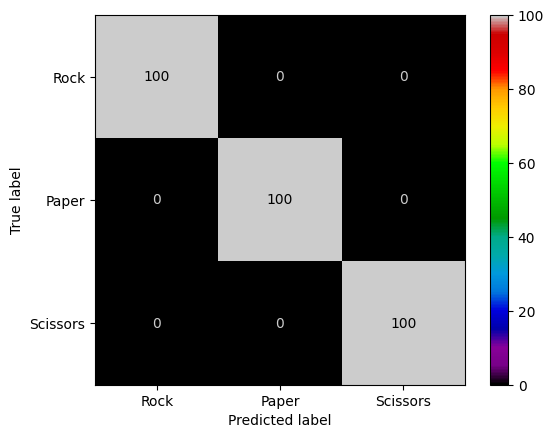

In [71]:
# train confusion matrix
confusion_matrix = metrics.confusion_matrix(labels, new_rvector) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Rock", "Paper", "Scissors"])
cm_display.plot(cmap = "nipy_spectral")
plt.show()

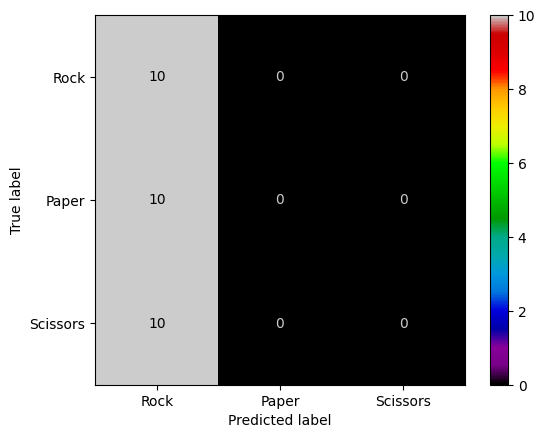

In [72]:
# test confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels, new_pvector) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Rock", "Paper", "Scissors"])
cm_display.plot(cmap = "nipy_spectral")
plt.show()

In [73]:
# list(range(21))[1:]

In [74]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(best_feature, labels)

predictions = list(neigh.predict(best_feature))
correct_p = [predictions[idx] for idx in range(len(predictions)) if predictions[idx] == list(labels)[idx]]
len(correct_p)/len(labels)


1.0

In [75]:
# accuracies = []

# for num in list(range(21))[1:]:
#     accuracies.append(get_accuracy(best_feature, labels, test_best_feature, test_labels, num))

In [76]:
# print(f'num_epochs: {accuracies.index(max(accuracies))+1}, max_accuracy: {max(accuracies)}')
